# **Geely Auto(Car features)**

## **EDA**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
link = "https://drive.google.com/file/d/1K4mAEssIiGBQqW1-rP5K5_7rDotdqs3L/view?usp=drive_link"
path = 'https://drive.google.com/uc?export=download&id=' + link.split('/')[-2]
df = pd.read_csv(path)
display(df.head(3))

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0


In [3]:
display(df.describe())
display(df.describe(exclude=[float,int]))

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

- Data có 26 cột và 205 hàng
- Có cột **CarID** sẽ không ảnh hưởng đến dự đoán giá tiền xe nên sẽ xóa bỏ
- Cột **CarName** cần tách ra thành 2 cột để lấy cột **CarCompany** vì nó sẽ ảnh hưởng đến giá tiền xe nói chung, cột thứ hai là **CarModel** xóa bỏ vì trong một hãng các model khác nhau không chênh lệch số tiền quá lớn
- Dữ liệu không có giá trị null

## **Analyst**

<Axes: xlabel='price', ylabel='Count'>

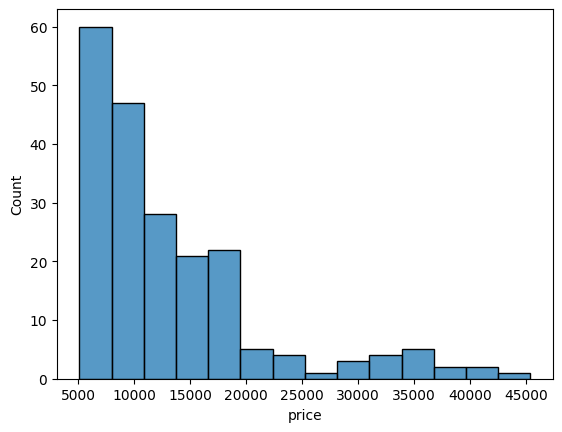

In [5]:
sns.histplot(data=df,x='price')

- Giá xe đang tập trung nhiều ở mức từ **5000 - 10000**

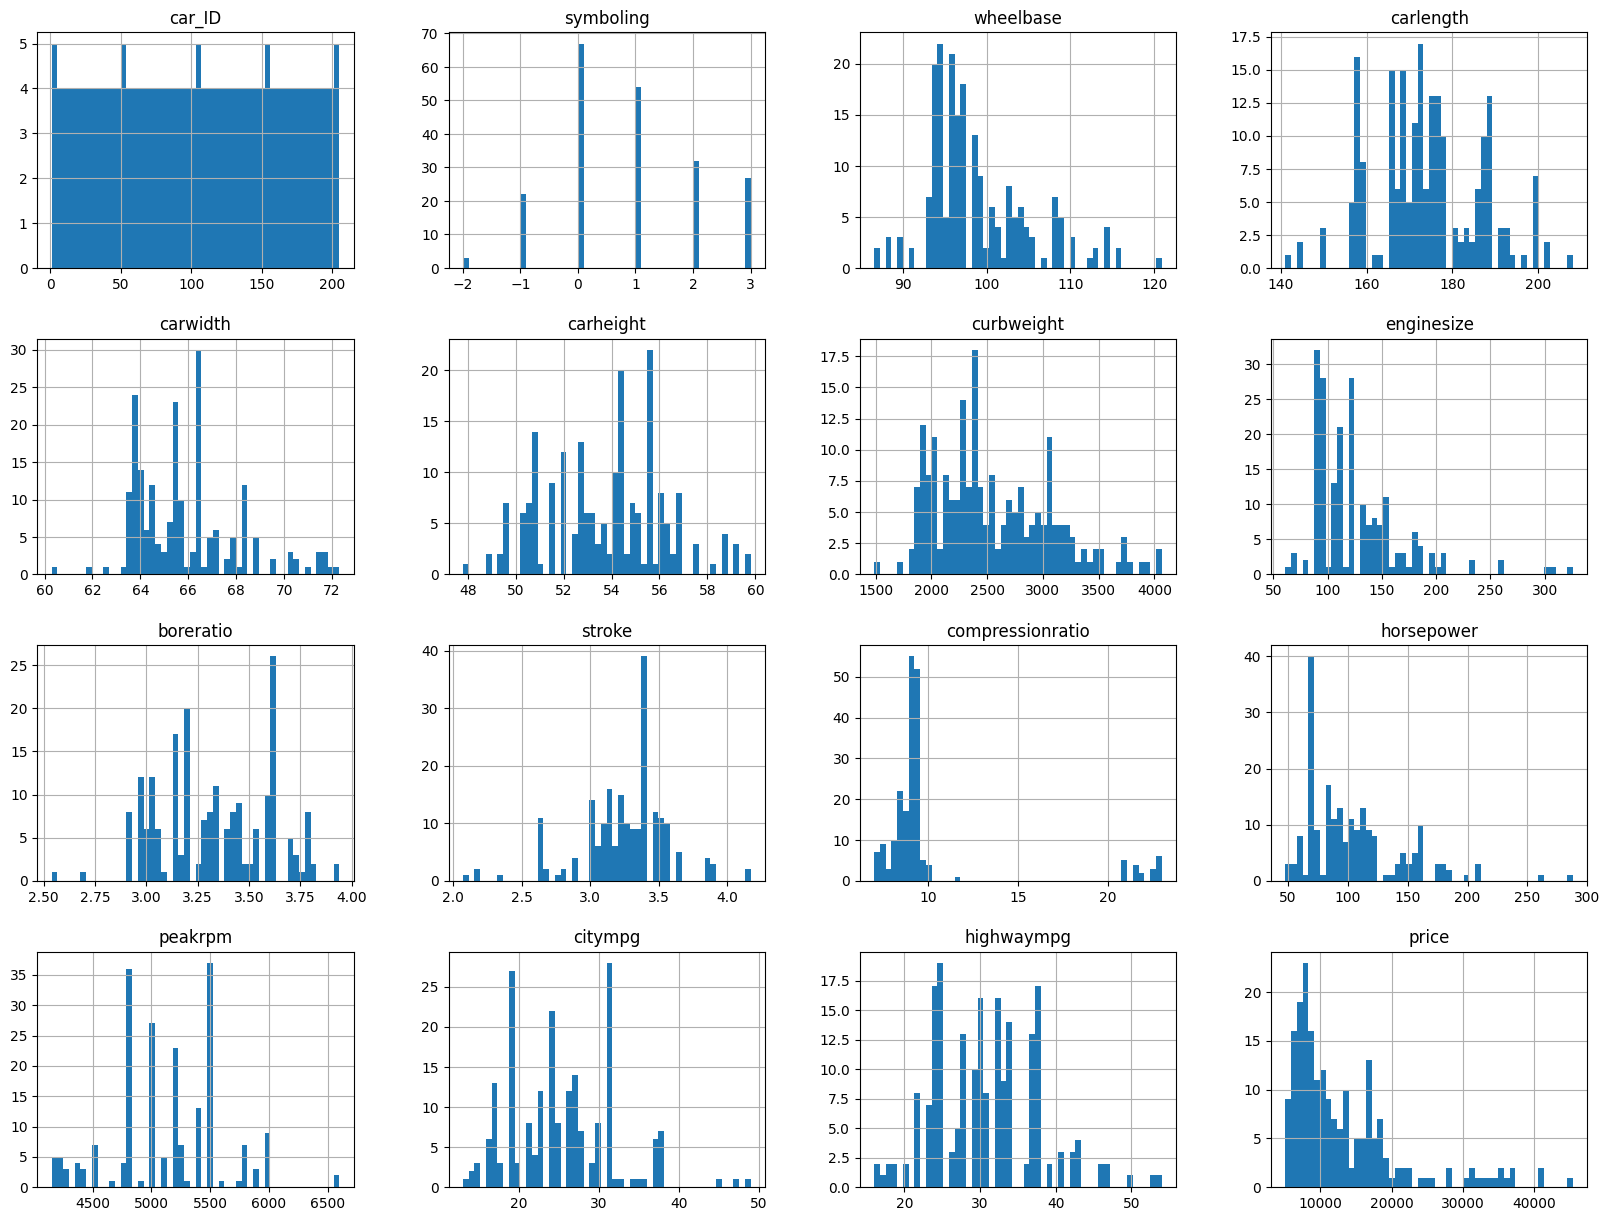

In [6]:
df.hist(bins=50, figsize=(20,15))#vẽ đồ thị histogram
plt.show()

- Có thể nhận thấy dữ liệu cột **CarID** là không cần thiết ==> Xóa bỏ

<Axes: >

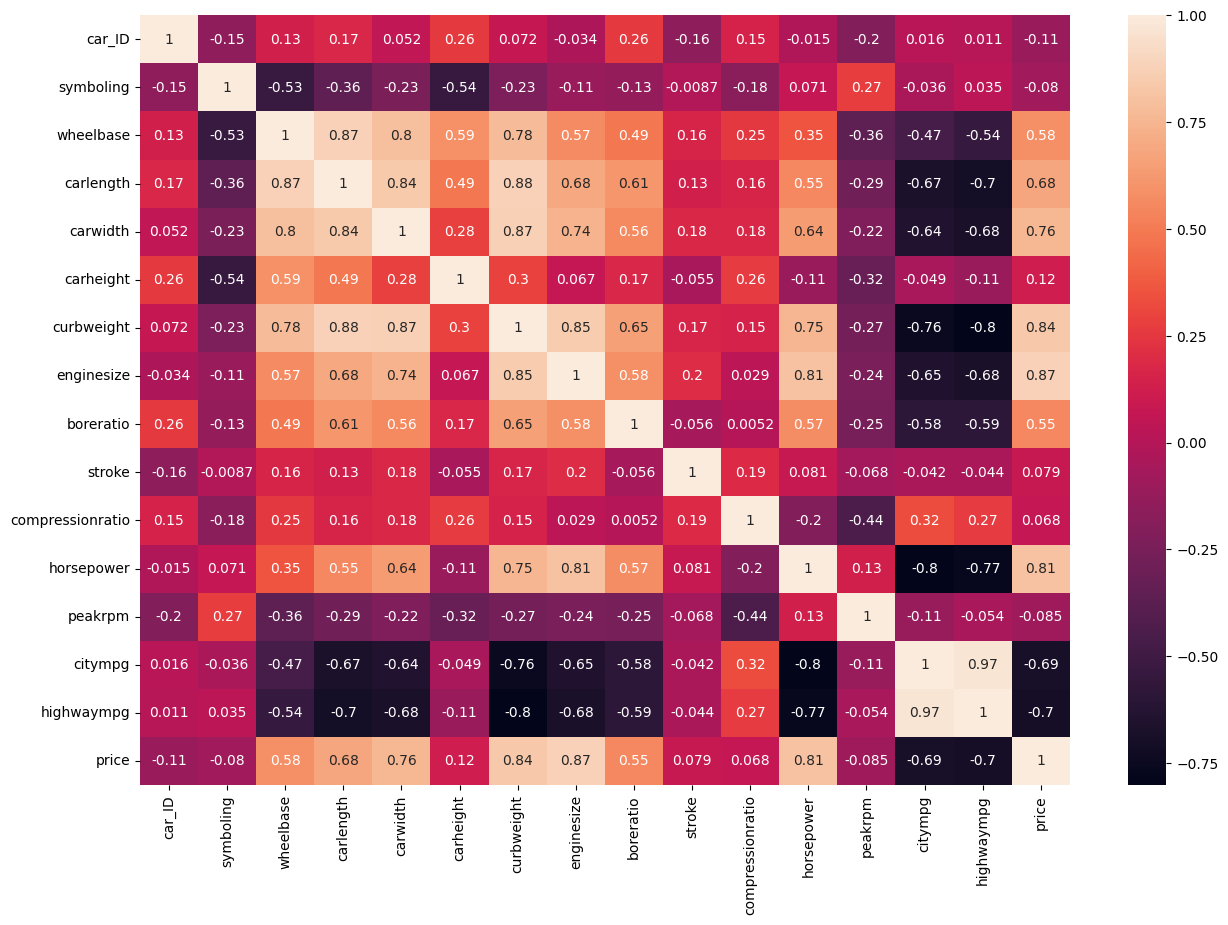

In [7]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(numeric_only=True),annot=True)

- Sau khi có ma trận tương quan, nhận thấy được, có những cột có hệ số tương quan thấp như **car_ID,symboling,wheelbase,carlength,carheight,boreratio,stroke,compressionratio,peakrpm** ==> Xóa bỏ
- Những features có ảnh hưởng đến giá xe **carwidth,curbweight,enginesize,horsepower,citympg,highwaympg**

## **PreProcessing**

### Xóa bỏ các cột không ảnh hưởng tới giá tiền của xe, xử lý cột **CarName**

In [8]:
df.drop(columns=['car_ID','symboling','wheelbase','carheight','carlength','boreratio','stroke','compressionratio','peakrpm'],inplace=True)
df.head(3)

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,horsepower,citympg,highwaympg,price
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,64.1,2548,dohc,four,130,mpfi,111,21,27,13495.0
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,64.1,2548,dohc,four,130,mpfi,111,21,27,16500.0
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,65.5,2823,ohcv,six,152,mpfi,154,19,26,16500.0


In [9]:
df[['CarCompany','CarModel']] = df['CarName'].str.split(' ',n=1,expand=True)
df.drop(columns=['CarName','CarModel'],inplace=True)
df["CarCompany"].value_counts()

CarCompany
toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: count, dtype: int64

### Xử lý duplicated

In [10]:
df.duplicated().sum()

0

- Dữ liệu không có giá trị duplicated --> Không cần phải xử lý

### Encoding

- Mã hóa dữ liệu các cột object 

In [11]:
df_o = df.select_dtypes(include='object')
for col in df_o.columns:
    print("*"*50)
    print(df_o[col].unique())

**************************************************
['gas' 'diesel']
**************************************************
['std' 'turbo']
**************************************************
['two' 'four']
**************************************************
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
**************************************************
['rwd' 'fwd' '4wd']
**************************************************
['front' 'rear']
**************************************************
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
**************************************************
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
**************************************************
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']
**************************************************
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan'
 'peugeot' 'plymouth' 'porsche' 'porcshce' 'renault' '

- Sau khi tách cột **CarName** để tạo cột **CarCompany**, có những hãng xe bị lặp lại nhưng do viết sai chính tả --> Sửa lại cho đúng

In [12]:
df_o['CarCompany'].replace('maxda','mazda',inplace=True)
df_o['CarCompany'].replace('Nissan','nissan',inplace=True)
df_o['CarCompany'].replace('porcshce','porsche',inplace=True)
df_o['CarCompany'].replace('toyouta','toyota',inplace=True)
df_o['CarCompany'].replace('vokswagen','volkswagen',inplace=True)

In [13]:
df['CarCompany'].replace('maxda','mazda',inplace=True)
df['CarCompany'].replace('Nissan','nissan',inplace=True)
df['CarCompany'].replace('porcshce','porsche',inplace=True)
df['CarCompany'].replace('toyouta','toyota',inplace=True)
df['CarCompany'].replace('vokswagen','volkswagen',inplace=True)

In [14]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder() # Sử dụng Ordinal Encoder vì có những cột có quá nhiều giá trị unique, nếu sử dụng OneHot sẽ tạo ra rất nhiều cột và sẽ làm tăng trường dữ liệu khiến cho model khó học hơn
for col in df_o.columns:
    print("*"*50)
    print(df_o[col].unique())
    df[df_o.columns] = oe.fit_transform(df[df_o.columns])
    print(df[col].unique())

**************************************************
['gas' 'diesel']
[1. 0.]
**************************************************
['std' 'turbo']
[0. 1.]
**************************************************
['two' 'four']
[1. 0.]
**************************************************
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
[0. 2. 3. 4. 1.]
**************************************************
['rwd' 'fwd' '4wd']
[2. 1. 0.]
**************************************************
['front' 'rear']
[0. 1.]
**************************************************
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
[0. 5. 3. 2. 6. 4. 1.]
**************************************************
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
[2. 3. 1. 4. 5. 6. 0.]
**************************************************
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']
[5. 1. 4. 0. 7. 2. 3. 6.]
**************************************************
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuz

In [15]:
df.corr()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,horsepower,citympg,highwaympg,price,CarCompany
fueltype,1.000000,-0.401397,0.191491,-0.147853,-0.132257,0.040070,-0.233880,-0.217275,0.082695,0.110617,-0.069594,0.041529,0.163926,-0.255963,-0.191392,-0.105679,-0.053792
aspiration,-0.401397,1.000000,-0.031792,0.063028,0.066465,-0.057191,0.300567,0.324902,-0.102963,-0.133119,0.108217,0.288086,0.241685,-0.202362,-0.254416,0.177926,0.009823
doornumber,0.191491,-0.031792,1.000000,-0.680358,0.098954,0.137757,-0.207168,-0.197379,0.062431,0.154322,-0.020742,0.015519,0.126947,0.012417,0.036330,-0.031835,-0.146311
carbody,-0.147853,0.063028,-0.680358,1.000000,-0.155745,-0.277009,0.131710,0.128467,-0.037024,-0.048408,-0.073352,-0.065079,-0.153928,0.031697,-0.007170,-0.083976,0.095197
drivewheel,-0.132257,0.066465,0.098954,-0.155745,1.000000,0.147865,0.470751,0.575111,-0.116823,0.223238,0.524307,0.424686,0.518686,-0.449581,-0.452220,0.577992,-0.058218
enginelocation,0.040070,-0.057191,0.137757,-0.277009,0.147865,1.000000,-0.051698,0.050468,0.114127,0.135541,0.196826,0.105971,0.317839,-0.153487,-0.102026,0.324973,0.053797
carwidth,-0.233880,0.300567,-0.207168,0.131710,0.470751,-0.051698,1.000000,0.867032,0.012298,-0.194074,0.735433,0.521434,0.640732,-0.642704,-0.677218,0.759325,-0.105946
curbweight,-0.217275,0.324902,-0.197379,0.128467,0.575111,0.050468,0.867032,1.000000,-0.055265,-0.047127,0.850594,0.611642,0.750739,-0.757414,-0.797465,0.835305,-0.079548
enginetype,0.082695,-0.102963,0.062431,-0.037024,-0.116823,0.114127,0.012298,-0.055265,1.000000,0.237390,0.040766,-0.091787,0.010301,-0.085004,-0.078456,0.049171,-0.081449
cylindernumber,0.110617,-0.133119,0.154322,-0.048408,0.223238,0.135541,-0.194074,-0.047127,0.237390,1.000000,-0.085613,0.011970,0.115612,-0.126422,-0.085897,-0.027628,0.052419


- Sau khi encoding xong, những feature ảnh hưởng nhiều đến giá xe là **carwidth, curbweight, enginesize, horsepower, citympg, highwaympg, CarCompany**
- Những cột còn lại có độ tương quan thấp ==> Xóa bỏ

In [16]:
df.drop(columns=[ 'fueltype','aspiration','doornumber','carbody', 'drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem'],inplace=True)
display(df.columns)
display(df.sample(3))

Index(['carwidth', 'curbweight', 'enginesize', 'horsepower', 'citympg',
       'highwaympg', 'price', 'CarCompany'],
      dtype='object')

,carwidth,curbweight,enginesize,horsepower,citympg,highwaympg,price,CarCompany
54,64.2,1950,91,68,31,38,7395.0,9.0
142,65.4,2190,108,82,28,33,7775.0,18.0
83,66.3,2921,156,145,19,24,14869.0,11.0


### Train Test Split

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns='price'),df.price,test_size= 0.3,random_state=42)

In [18]:
X_train.head(3)

,carwidth,curbweight,enginesize,horsepower,citympg,highwaympg,CarCompany
177,66.5,2458,122,92,27,32,19.0
75,68.0,2910,140,175,19,24,10.0
174,66.5,2480,110,73,30,33,19.0


### Scale Data

In [19]:
from sklearn.preprocessing import StandardScaler
model_scale = StandardScaler()
model_scale.fit(X_train) 
X_train_scale = model_scale.transform(X_train)
X_test_scale = model_scale.transform(X_test)
print(X_train)
print(X_train_scale)

     carwidth  curbweight  enginesize  horsepower  citympg  highwaympg  \
177      66.5        2458         122          92       27          32   
75       68.0        2910         140         175       19          24   
174      66.5        2480         110          73       30          33   
31       63.9        1819          92          76       31          38   
12       64.8        2710         164         121       21          28   
..        ...         ...         ...         ...      ...         ...   
106      67.9        3139         181         160       19          25   
14       66.9        3055         164         121       20          25   
92       63.8        1938          97          69       31          37   
179      67.7        3016         171         161       19          24   
102      66.5        3296         181         152       17          22   

     CarCompany  
177        19.0  
75         10.0  
174        19.0  
31          6.0  
12          2.0  
.. 

## **Modeling**

### **LIB**

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

### **Train Model**

#### Liner Regression

In [21]:
model_lr = LinearRegression()
model_lr.fit(X_train_scale,y_train)

LinearRegression()

#### SVR

In [22]:
model_svr =  SVR(kernel='linear',gamma='auto')
model_svr.fit(X_train_scale,y_train)

SVR(gamma='auto', kernel='linear')

#### KNN Regression

In [23]:
model_knn = KNeighborsRegressor(n_neighbors=2)
model_knn.fit(X_train_scale,y_train)

KNeighborsRegressor(n_neighbors=2)

#### Decision Tree Regression

In [24]:
model_dr = DecisionTreeRegressor()
model_dr.fit(X_train_scale,y_train)

DecisionTreeRegressor()

#### Random Forest Regression

In [25]:
model_rf = RandomForestRegressor()
model_rf.fit(X_train_scale,y_train)

RandomForestRegressor()

### **Evaluate Model**

#### Linear Regression

In [26]:
y_pred_test = model_lr.predict(X_test_scale)
y_pred_train = model_lr.predict(X_train_scale)
# R2 and Mae of train
r2_train = r2_score(y_train,y_pred_train)
mae_train = mean_absolute_error(y_train,y_pred_train)
#R2 and Mae of test
r2_test = r2_score(y_test,y_pred_test)
mae_test = mean_absolute_error(y_test,y_pred_test)
#Display
print('R2_score of train: {}'.format(r2_train))
print('MAE of train: {}'.format(mae_train))
print('R2_score of test: {}'.format(r2_test))
print('MAE of test: {}'.format(mae_test))

R2_score of train: 0.8531168789388199
MAE of train: 2215.945731345606
R2_score of test: 0.7989208865318215
MAE of test: 2585.733157008092


- Model **Linear Regression** dự đoán với độ chính xác cao (**good fitting**) ==> **Train** : 0.85, **Test** : 0.79
- Tuy model good fitting nhưng chỉ số **MAE** của train và test hiện tại còn khá cao (**Train**= 2215, **Test**= 2585) ==> Tìm ra giải pháp hoặc model khác để giảm độ lỗi

#### SVR

In [27]:
y_pred_test = model_svr.predict(X_test_scale)
y_pred_train = model_svr.predict(X_train_scale)
# R2 and Mae of train
r2_train = r2_score(y_train,y_pred_train)
mae_train = mean_absolute_error(y_train,y_pred_train)
#R2 and Mae of test
r2_test = r2_score(y_test,y_pred_test)
mae_test = mean_absolute_error(y_test,y_pred_test)
#Display
print('R2_score of train: {}'.format(r2_train))
print('MAE of train: {}'.format(mae_train))
print('R2_score of test: {}'.format(r2_test))
print('MAE of test: {}'.format(mae_test))

R2_score of train: 0.021518337834973478
MAE of train: 5116.735338287889
R2_score of test: 0.04763063884148255
MAE of test: 5039.521632440835


- Model **SVR** dự đoán với độ chính xác thấp trên cả tệp train và test (**Underfitting**) ==> **Train**= 0.02, **Test**= 0.004
- Với độ lỗi của mô hình cao (**Train,Test** = xấp xỉ 5100)

#### KNN Regression

In [28]:
y_pred_test = model_knn.predict(X_test_scale)
y_pred_train = model_knn.predict(X_train_scale)
# R2 and Mae of train
r2_train = r2_score(y_train,y_pred_train)
mae_train = mean_absolute_error(y_train,y_pred_train)
#R2 and Mae of test
r2_test = r2_score(y_test,y_pred_test)
mae_test = mean_absolute_error(y_test,y_pred_test)
#Display
print('R2_score of train: {}'.format(r2_train))
print('MAE of train: {}'.format(mae_train))
print('R2_score of test: {}'.format(r2_test))
print('MAE of test: {}'.format(mae_test))

R2_score of train: 0.9633847582717328
MAE of train: 964.9825174825174
R2_score of test: 0.8985626494628356
MAE of test: 1676.5793064516129


- Model **KNN Regressor** cho ra độ chính xác trên cả tệp train và test rất cao(**Good fitting**): **Train**= 0.96, **Test**= 0.89
- Với độ lỗi trên các tệp train test thấp hơn so với model **Linear Regression** (**Train**= 964, **Test**= 1676)
- Tuy nhiên đây là model không học nhiều nên việc sử dụng để dự đoán sẽ dễ xảy ra rủi ro

#### Decision Tree Regression

In [29]:
y_pred_test = model_dr.predict(X_test_scale)
y_pred_train = model_dr.predict(X_train_scale)
# R2 and Mae of train
r2_train = r2_score(y_train,y_pred_train)
mae_train = mean_absolute_error(y_train,y_pred_train)
#R2 and Mae of test
r2_test = r2_score(y_test,y_pred_test)
mae_test = mean_absolute_error(y_test,y_pred_test)
#Display
print('R2_score of train: {}'.format(r2_train))
print('MAE of train: {}'.format(mae_train))
print('R2_score of test: {}'.format(r2_test))
print('MAE of test: {}'.format(mae_test))

R2_score of train: 0.998538426543197
MAE of train: 70.27972027972028
R2_score of test: 0.8800576063229628
MAE of test: 1855.787629032258


- Model **Decision Tree Regression** cho ra độ chính xác cực kỳ cao trên cả 2 tệp train và test (**Good Fitting**): **Train**= 0.99, **Test**= 0.88
- Với độ lỗi của model thấp (**Train**= 70.2, **Test**= 1850)

#### Random Forest Regression

In [30]:
y_pred_test = model_rf.predict(X_test_scale)
y_pred_train = model_rf.predict(X_train_scale)
# R2 and Mae of train
r2_train = r2_score(y_train,y_pred_train)
mae_train = mean_absolute_error(y_train,y_pred_train)
#R2 and Mae of test
r2_test = r2_score(y_test,y_pred_test)
mae_test = mean_absolute_error(y_test,y_pred_test)
#Display
print('R2_score of train: {}'.format(r2_train))
print('MAE of train: {}'.format(mae_train))
print('R2_score of test: {}'.format(r2_test))
print('MAE of test: {}'.format(mae_test))

R2_score of train: 0.9861364374278339
MAE of train: 591.4499650349651
R2_score of test: 0.9422438253413932
MAE of test: 1372.1785929339474


- Model **Random Forest Regression** cho ra độ chính xác trên cả 2 tệp train và test cũng rất cao (**Good fitting**): **Train**= 0.98, **Test**= 0.94
- Tuy độ chính xác trên tệp train của model **Random Forest Regression** thấp hơn 0.01 so với model **Decision Tree Regression** nhưng độ lỗi của model **Random Forest Regression** lại thấp hơn (**Train**= 576.9, **Test**= 1360)

## **Conclusion**

- Model **Random Forest Regressor** là model thích hợp nhất để dự đoán giá xe dựa trên các features có trong tệp dữ liệu này
- Model cho ra độ chính xác trên cả 2 tệp train test là rất cao với **Train** = 98% và **Test** = 94%, hơn tất cả các model regression bên trên
- Ngoài ra chỉ số **MAE** (độ lệch giá so với tệp gốc) là không quá cao so với dữ liệu giá xe đã cho ==> **Xấp xỉ 1360**

In [31]:
# model_svm
from joblib import dump
path = "model_rf.joblib"
dump(model_rf, path)

['model_rf.joblib']

# **Bank (Churn Rate)**

## **EDA**

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

In [33]:
link = "https://drive.google.com/file/d/1hx8WxB7JF2SoLcLpUzIMO244Y2Ve-aeI/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id=' + link.split('/')[-2]
df_bank = pd.read_csv(path)
display(df_bank.head(3))

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [34]:
display(df_bank.describe())
display(df_bank.describe(exclude=[float,int]))

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


,country,gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


- Dữ liệu có **10000 dòng và 12 cột**
- Cột **Customer_ID** không ảnh hưởng tới việc người đó có sử dụng tiếp dịch vụ hay không ==> Xóa bỏ
- Các cột hiện tại không quan sát thấy giá trị null
- Có 2 cột là object **Country,Gender** --> Encoding

## **Analyst**

[Text(0, 0, '7963'), Text(0, 0, '2037')]

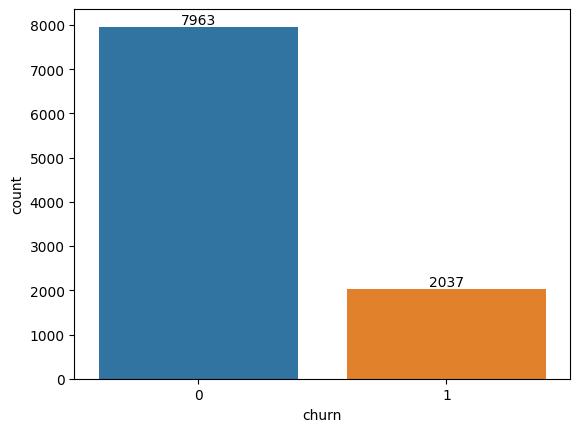

In [35]:
ax = sns.countplot(x='churn',data=df_bank)
ax.bar_label(ax.containers[0])

- Data này đang bị **imbalance** nặng: **Số lượng người tiếp tục sử dụng**= 7963 và **Số lượng người ngưng sử dụng dịch vụ**= 2037 ==> Xử lý imbalance

<Axes: xlabel='churn', ylabel='count'>

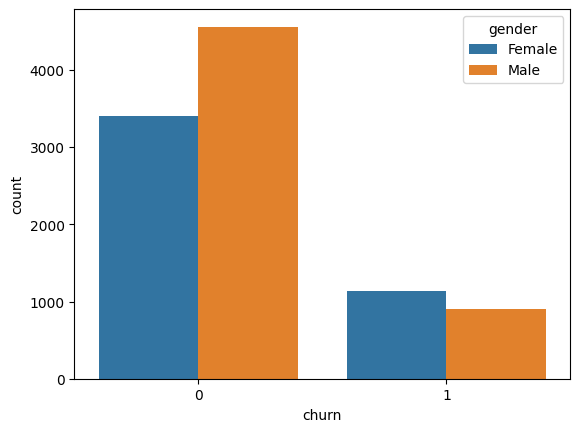

In [36]:
sns.countplot(x = "churn",hue="gender",data=df_bank)

- Trong những người tiếp tục sử dụng dịch vụ, tỉ lệ nam chiếm nhiều hơn nữ
- Trong những người không tiếp tục sử dụng dịch vụ, tỉ lệ nữ nhiều hơn nam

<Axes: >

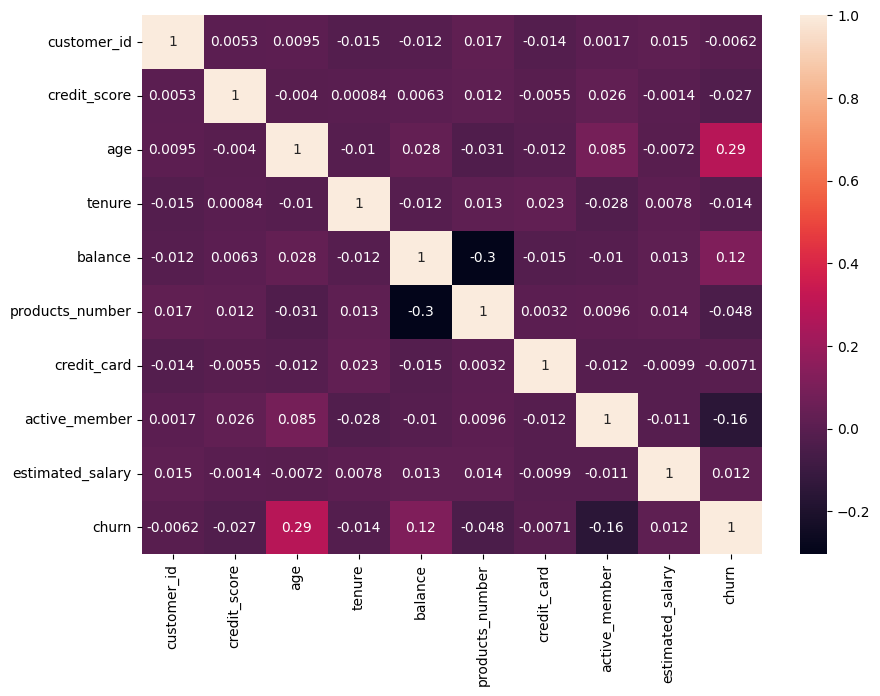

In [37]:
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(df_bank.corr(numeric_only=True),annot=True)

- Có thể thấy do dữ liệu hiện tại đang mất cân bằng nên không thể đánh giá độ tương quan một cách chính xác qua biểu đồ nhiết ==> Sau bước PreProcessing sẽ đánh giá sau

## **PreProcessing**

### Xử lý cột **CustomerID**

In [38]:
df_bank.drop(columns='customer_id')

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


### Xử lý Duplicated

In [39]:
df_bank.duplicated().sum()

0

- Data không có các giá trị duplicated ==> Không cần phải xử lý các giá trị duplicated

### Encoding

In [40]:
df_bank = pd.get_dummies(df_bank) 
# Sử dụng OneHotEncoder vì dữ liệu của các cột object có ít giá trị unqiue, 
# và số lượng cột hiện có cũng không quá nhiều
df_bank.head(5)

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain,gender_Female,gender_Male
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,True,False,False,True,False
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True,True,False
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,True,False,False,True,False
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,True,False,False,True,False
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True,True,False


<Axes: >

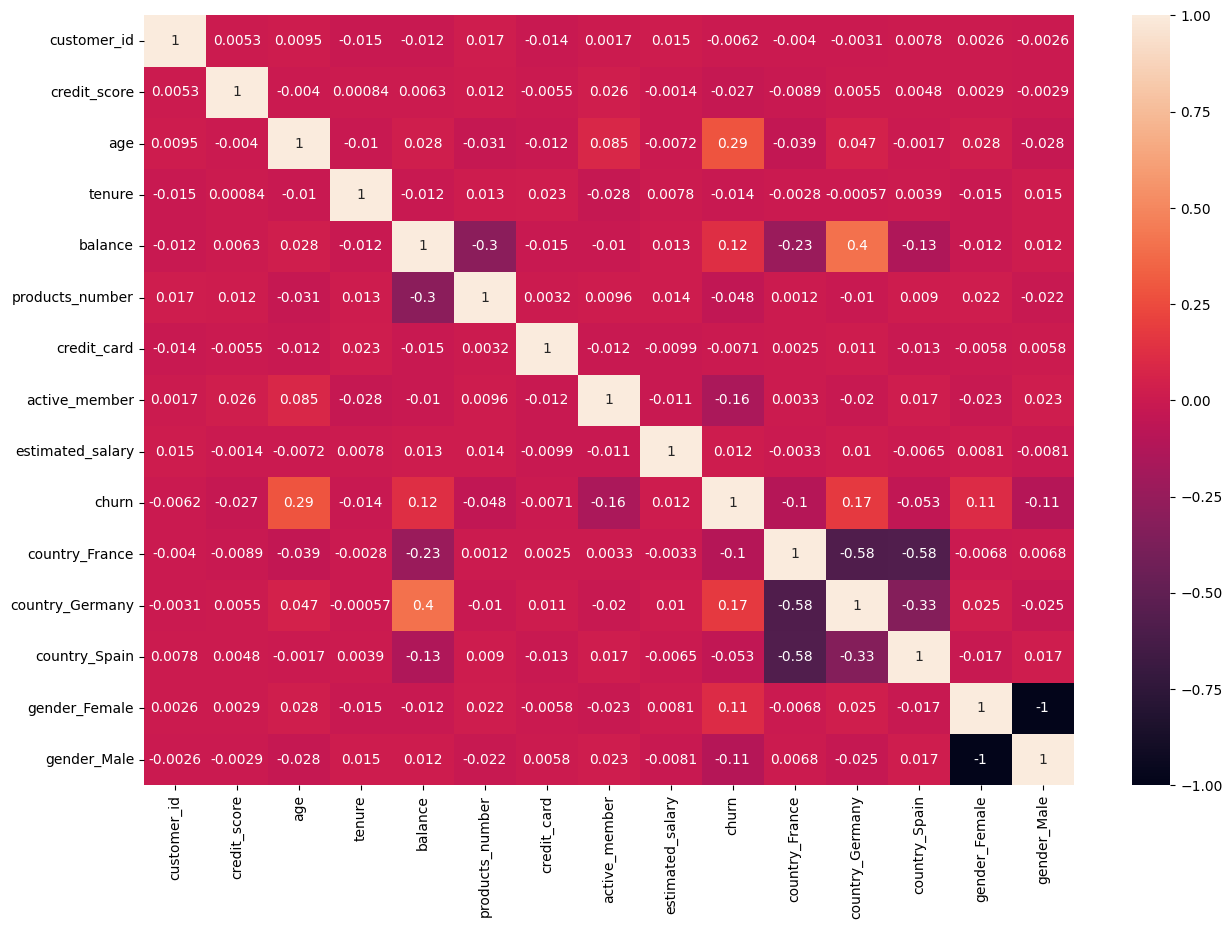

In [41]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df_bank.corr(),annot=True)

- Sau khi Encoding và vẽ lại heatmap, có thể thấy những features ảnh hưởng nhiều đến **sự rời bỏ** của khách hàng gồm: **age,active_member,balance,France,Germany,Female,Male**
- Tuy nhiên sẽ không xóa cột nào hết vì những giá trị tương quan ở trên phân bố thấp đều và trường dữ liệu không quá lớn để xóa 

### Xử lý Imbalanced

In [42]:
df_bank['churn'].value_counts()

churn
0    7963
1    2037
Name: count, dtype: int64

#### **UnderSamping ngẫu nhiên** --> df_under

Sử dụng **UnderSampling** để cắt ngẫu nhiêu dữ liệu bên **nhóm 0** để lấy ra 2037 hàng

In [43]:
df_0 = df_bank[df_bank.churn==0]
df_1 = df_bank[df_bank.churn==1]
df_0.shape, df_1.shape

((7963, 15), (2037, 15))

In [44]:
df_0_resapled=df_0.sample(2037)
df_0_resapled.shape

(2037, 15)

In [45]:
df_under = pd.concat([df_0_resapled, df_1])

<Axes: ylabel='count'>

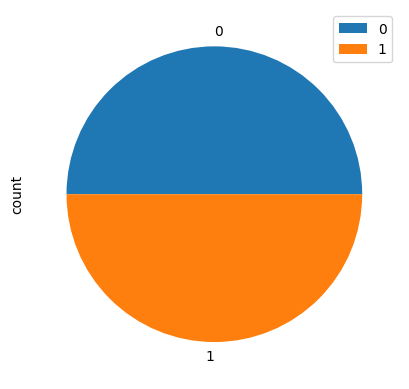

In [46]:
df_under['churn'].value_counts().plot.pie(legend = ["0", "1"])

In [47]:
df_under.head()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain,gender_Female,gender_Male
9469,15674573,713,25,4,121172.97,1,1,1,56268.98,0,True,False,False,True,False
765,15812351,710,27,2,135277.96,1,1,0,142200.15,0,False,False,True,True,False
9091,15630195,745,40,6,131184.67,1,1,1,49815.62,0,True,False,False,True,False
8879,15774277,809,43,2,0.00,2,1,1,132908.07,0,True,False,False,False,True
492,15624170,639,38,4,81550.94,2,0,1,118974.77,0,True,False,False,True,False


#### **Under Sampling với thư viện Near Miss** --> X_under, y_under

In [48]:
y = df_bank["churn"].values
X = df_bank.drop(columns='churn').values

In [49]:
from imblearn.under_sampling import NearMiss
NearMiss_Model = NearMiss(version = 3) # Có 3 phương pháp NearMiss 1,2,3
X_under, y_under = NearMiss_Model.fit_resample(X, y)
X_under.shape, y_under.shape # Kích thước của X và y

((4074, 14), (4074,))

In [50]:
import numpy as np
np.count_nonzero(y_under == 0)

2037

In [51]:
y_under.sum()

2037

#### **OverSampling ngẫu nhiên bằng RandomOverSampler** --> X_over, y_over

In [52]:
from imblearn.over_sampling import RandomOverSampler
y = df_bank['churn'].values
X = df_bank.drop(columns='churn').values
ROS_model = RandomOverSampler()
X_over,y_over = ROS_model.fit_resample(X,y)
X_over.shape, y_over.shape

((15926, 14), (15926,))

In [53]:
np.count_nonzero(y_over == 1)

7963

In [54]:
np.count_nonzero(y_over == 0)

7963

#### **Oversampling bằng SMOTE** --> X_SM, y_SM

In [55]:
from imblearn.over_sampling import SMOTE
y = df_bank["churn"].values #Load lại X, y tù bảng data gốc
X = df_bank.drop(columns='churn').values
SM_Model = SMOTE()
X_SM, y_SM = SM_Model.fit_resample(X, y)
X_SM.shape, y_SM.shape

((15926, 14), (15926,))

### Train Test Split và Scale Data

#### Train test split từ **df_under**

In [56]:
from sklearn.model_selection import train_test_split
Xrd_train,Xrd_test,yrd_train,yrd_test = train_test_split(df_under.drop(columns='churn'),df_under.churn,test_size=0.3,random_state=42)
from sklearn.preprocessing import StandardScaler
model_scale = StandardScaler()
model_scale.fit(Xrd_train)
Xrd_train_scale = model_scale.transform(Xrd_train)
Xrd_test_scale = model_scale.transform(Xrd_test)

#### Train test split từ **X_under**,**y_under**

In [57]:
Xu_train,Xu_test,yu_train,yu_test = train_test_split(X_under,y_under,test_size=0.3,random_state=42)
model_scale = StandardScaler()
model_scale.fit(Xu_train)
Xu_train_scale = model_scale.transform(Xu_train)
Xu_test_scale = model_scale.transform(Xu_test)

#### Train test split từ **X_over**,**y_over**

In [58]:
Xo_train,Xo_test,yo_train,yo_test = train_test_split(X_over,y_over,test_size=0.3,random_state=42)
model_scale = StandardScaler()
model_scale.fit(Xo_train)
Xo_train_scale = model_scale.transform(Xo_train)
Xo_test_scale = model_scale.transform(Xo_test)

#### Train test split từ **X_SM**,**y_SM**

In [59]:
Xsm_train,Xsm_test,ysm_train,ysm_test = train_test_split(X_SM,y_SM,test_size=0.3,random_state=42)
model_scale = StandardScaler()
model_scale.fit(Xsm_train)
Xsm_train_scale = model_scale.transform(Xsm_train)
Xsm_test_scale = model_scale.transform(Xsm_test)

## **Modeling**

### LIB

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
model_lrc = LogisticRegression()
model_svc = SVC()
model_knc = KNeighborsClassifier()
model_dtc = DecisionTreeClassifier()
model_nbc = GaussianNB()
model_rfc = RandomForestClassifier()

### **UnderSampling ngẫu nhiên** train and evaluate model

#### **Train Model**

In [61]:
model_lrc.fit(Xrd_train_scale,yrd_train)
model_svc.fit(Xrd_train_scale,yrd_train)
model_knc.fit(Xrd_train_scale,yrd_train)
model_dtc.fit(Xrd_train_scale,yrd_train)
model_nbc.fit(Xrd_train_scale,yrd_train)
model_rfc.fit(Xrd_train_scale,yrd_train)

RandomForestClassifier()

#### **Evaluate Model**

##### Logistic Regression

In [62]:
yrd_pred = model_lrc.predict(Xrd_train_scale)
print(classification_report(yrd_train,yrd_pred))

              precision    recall  f1-score   support

           0       0.70      0.71      0.70      1397
           1       0.71      0.71      0.71      1454

    accuracy                           0.71      2851
   macro avg       0.71      0.71      0.71      2851
weighted avg       0.71      0.71      0.71      2851



In [63]:
yrd_pred = model_lrc.predict(Xrd_test_scale)
print(classification_report(yrd_test,yrd_pred))

              precision    recall  f1-score   support

           0       0.75      0.73      0.74       640
           1       0.71      0.73      0.72       583

    accuracy                           0.73      1223
   macro avg       0.73      0.73      0.73      1223
weighted avg       0.73      0.73      0.73      1223



- Model **Logistic Regression** cho ra độ chính xác của hai tệp train test khá cao
- **Train**= 0.71, **Test**=0.73 (**Good Fitting**)

##### SVC

In [64]:
yrd_pred = model_svc.predict(Xrd_train_scale)
print(classification_report(yrd_train,yrd_pred))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81      1397
           1       0.83      0.81      0.82      1454

    accuracy                           0.82      2851
   macro avg       0.82      0.82      0.82      2851
weighted avg       0.82      0.82      0.82      2851



In [65]:
yrd_pred = model_svc.predict(Xrd_test_scale)
print(classification_report(yrd_test,yrd_pred))

              precision    recall  f1-score   support

           0       0.76      0.79      0.78       640
           1       0.76      0.73      0.74       583

    accuracy                           0.76      1223
   macro avg       0.76      0.76      0.76      1223
weighted avg       0.76      0.76      0.76      1223



- Model **SVC** cũng tương tự cho ra độ chính xác trên cả hai tệp tain test cao
- **Train**= 0.82, **Test**=0.76 (**Good Fitting**)

##### KNN Classifier

In [66]:
yrd_pred = model_knc.predict(Xrd_train_scale)
print(classification_report(yrd_train,yrd_pred))

              precision    recall  f1-score   support

           0       0.79      0.82      0.81      1397
           1       0.82      0.79      0.81      1454

    accuracy                           0.81      2851
   macro avg       0.81      0.81      0.81      2851
weighted avg       0.81      0.81      0.81      2851



In [67]:
yrd_pred = model_knc.predict(Xrd_test_scale)
print(classification_report(yrd_test,yrd_pred))

              precision    recall  f1-score   support

           0       0.71      0.72      0.72       640
           1       0.69      0.68      0.69       583

    accuracy                           0.70      1223
   macro avg       0.70      0.70      0.70      1223
weighted avg       0.70      0.70      0.70      1223



- Model **KNN Classifier** cho ra độ chính xác của tệp **Train** cao = 0.8 và **Test** cao = 0.7

##### Decision Tree Classifier

In [68]:
yrd_pred = model_dtc.predict(Xrd_train_scale)
print(classification_report(yrd_train,yrd_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1397
           1       1.00      1.00      1.00      1454

    accuracy                           1.00      2851
   macro avg       1.00      1.00      1.00      2851
weighted avg       1.00      1.00      1.00      2851



In [69]:
yrd_pred = model_dtc.predict(Xrd_test_scale)
print(classification_report(yrd_test,yrd_pred))

              precision    recall  f1-score   support

           0       0.71      0.68      0.70       640
           1       0.67      0.69      0.68       583

    accuracy                           0.69      1223
   macro avg       0.69      0.69      0.69      1223
weighted avg       0.69      0.69      0.69      1223



- Model **Decision Tree Classifier** có độ chính xác 100% trên tệp **train**,  tệp **test** = 69%

##### GaussianNB

In [70]:
yrd_pred = model_nbc.predict(Xrd_train_scale)
print(classification_report(yrd_train,yrd_pred))

              precision    recall  f1-score   support

           0       0.69      0.73      0.71      1397
           1       0.72      0.69      0.70      1454

    accuracy                           0.71      2851
   macro avg       0.71      0.71      0.71      2851
weighted avg       0.71      0.71      0.71      2851



In [71]:
yrd_pred = model_nbc.predict(Xrd_test_scale)
print(classification_report(yrd_test,yrd_pred))

              precision    recall  f1-score   support

           0       0.71      0.76      0.73       640
           1       0.71      0.66      0.69       583

    accuracy                           0.71      1223
   macro avg       0.71      0.71      0.71      1223
weighted avg       0.71      0.71      0.71      1223



- Model **GaussianNB** cho độ chính xác trên cả hai tệp là bằng nhau
- **Train**= 0.71, **Test**= 0.71

##### Random Forest Classifier

In [72]:
yrd_pred = model_rfc.predict(Xrd_train_scale)
print(classification_report(yrd_train,yrd_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1397
           1       1.00      1.00      1.00      1454

    accuracy                           1.00      2851
   macro avg       1.00      1.00      1.00      2851
weighted avg       1.00      1.00      1.00      2851



In [73]:
yrd_pred = model_rfc.predict(Xrd_test_scale)
print(classification_report(yrd_test,yrd_pred))

              precision    recall  f1-score   support

           0       0.77      0.80      0.78       640
           1       0.77      0.73      0.75       583

    accuracy                           0.77      1223
   macro avg       0.77      0.77      0.77      1223
weighted avg       0.77      0.77      0.77      1223



- Model **Random Forest Classifier** có độ chính xác trên tệp **Train** là 100% và **Test** là 77%

#### **Conclusion 1**


- Sau khi xử lý dữ liệu bằng mất cân bằng bằng phương pháp **UnderSampling ngẫu nhiên**, model hoạt động tốt nhất và cho ra độ chính xác cao nhất là **Random Forest**
- Độ chính xác ở tệp **Train** = **100%** và ở tệp **Test** = xấp xỉ **77%**
- Tuy nhiên, cần evaluate thêm model ở các cách xử lý imbalance khác để tìm ra model có chỉ số cao nhất

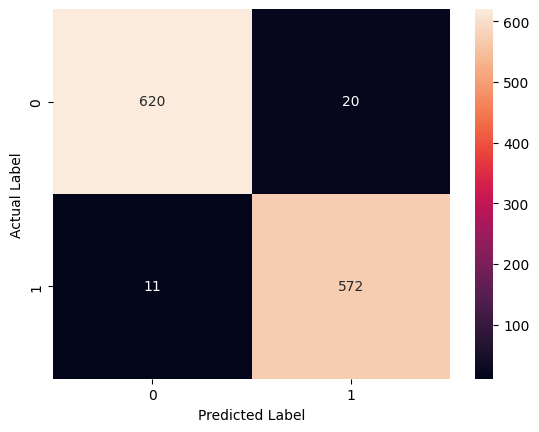

In [103]:
yrd_pred_svc = model_rfc.predict(Xrd_test_scale)
acc = accuracy_score(yrd_test, yrd_pred_svc)
cm = confusion_matrix(yrd_test, yrd_pred_svc)
sns.heatmap(cm, annot = True,fmt='g')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

- **True Positive** = 572
- **True Negative** = 620
- **False Positive** = 20
- **False Negative** = 11

### **UnderSampling NearMiss** train and evaluate model

#### **Train Model**

In [75]:
model_lrc.fit(Xu_train_scale,yu_train)
model_svc.fit(Xu_train_scale,yu_train)
model_knc.fit(Xu_train_scale,yu_train)
model_dtc.fit(Xu_train_scale,yu_train)
model_nbc.fit(Xu_train_scale,yu_train)
model_rfc.fit(Xu_train_scale,yu_train)

RandomForestClassifier()

#### **Evaluate Model**

##### Logistic Regression

In [76]:
yu_pred = model_lrc.predict(Xu_train_scale)
print(classification_report(yu_train,yu_pred))

              precision    recall  f1-score   support

           0       0.70      0.71      0.70      1397
           1       0.72      0.70      0.71      1454

    accuracy                           0.71      2851
   macro avg       0.71      0.71      0.71      2851
weighted avg       0.71      0.71      0.71      2851



In [77]:
yu_pred = model_lrc.predict(Xu_test_scale)
print(classification_report(yu_test,yu_pred))

              precision    recall  f1-score   support

           0       0.74      0.70      0.71       640
           1       0.68      0.73      0.70       583

    accuracy                           0.71      1223
   macro avg       0.71      0.71      0.71      1223
weighted avg       0.71      0.71      0.71      1223



- Model **Logistic Regression** có độ chính xác trên cả hai tệp train test ở mức khá cao
- **Train**= 0.71, **Test**= 0.71 (**Good Fitting**)

##### SVC

In [78]:
yu_pred = model_svc.predict(Xu_train_scale)
print(classification_report(yu_train,yu_pred))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81      1397
           1       0.84      0.77      0.80      1454

    accuracy                           0.80      2851
   macro avg       0.81      0.80      0.80      2851
weighted avg       0.81      0.80      0.80      2851



In [79]:
yu_pred = model_lrc.predict(Xu_test_scale)
print(classification_report(yu_test,yu_pred))

              precision    recall  f1-score   support

           0       0.74      0.70      0.71       640
           1       0.68      0.73      0.70       583

    accuracy                           0.71      1223
   macro avg       0.71      0.71      0.71      1223
weighted avg       0.71      0.71      0.71      1223



- Model **SVC** có độ chính xác cao trên cả 2 tệp train và test
- **Train**= 0.8, **Test**= 0.71 (**Good Fitting**)

##### KNN Classifier

In [80]:
yu_pred = model_knc.predict(Xu_train_scale)
print(classification_report(yu_train,yu_pred))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81      1397
           1       0.83      0.79      0.81      1454

    accuracy                           0.81      2851
   macro avg       0.81      0.81      0.81      2851
weighted avg       0.81      0.81      0.81      2851



In [81]:
yu_pred = model_knc.predict(Xu_test_scale)
print(classification_report(yu_test,yu_pred))

              precision    recall  f1-score   support

           0       0.71      0.72      0.71       640
           1       0.68      0.67      0.68       583

    accuracy                           0.70      1223
   macro avg       0.70      0.69      0.69      1223
weighted avg       0.70      0.70      0.70      1223



- Model **KNN** có độ chính xác tương tự như **SVC**, cao trên cả 2 tệp train và test
- **Train**= 0.81, **Test**= 0.7

##### GaussianNB

In [82]:
yu_pred = model_nbc.predict(Xu_train_scale)
print(classification_report(yu_train,yu_pred))

              precision    recall  f1-score   support

           0       0.68      0.77      0.72      1397
           1       0.75      0.65      0.70      1454

    accuracy                           0.71      2851
   macro avg       0.71      0.71      0.71      2851
weighted avg       0.72      0.71      0.71      2851



In [83]:
yu_pred = model_nbc.predict(Xu_test_scale)
print(classification_report(yu_test,yu_pred))

              precision    recall  f1-score   support

           0       0.71      0.78      0.74       640
           1       0.73      0.65      0.68       583

    accuracy                           0.72      1223
   macro avg       0.72      0.71      0.71      1223
weighted avg       0.72      0.72      0.71      1223



- Model **GaussianNB** có độ chính xác ở cả 2 tệp train test ở mức cao
- **Train**= 0.71, **Test**= 0.72

##### Decision Tree Classifier

In [84]:
yu_pred = model_dtc.predict(Xu_train_scale)
print(classification_report(yu_train,yu_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1397
           1       1.00      1.00      1.00      1454

    accuracy                           1.00      2851
   macro avg       1.00      1.00      1.00      2851
weighted avg       1.00      1.00      1.00      2851



In [85]:
yu_pred = model_dtc.predict(Xu_test_scale)
print(classification_report(yu_test,yu_pred))

              precision    recall  f1-score   support

           0       0.72      0.71      0.71       640
           1       0.68      0.69      0.69       583

    accuracy                           0.70      1223
   macro avg       0.70      0.70      0.70      1223
weighted avg       0.70      0.70      0.70      1223



##### Random Forest Classifier

In [86]:
yu_pred = model_rfc.predict(Xu_train_scale)
print(classification_report(yu_train,yu_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1397
           1       1.00      1.00      1.00      1454

    accuracy                           1.00      2851
   macro avg       1.00      1.00      1.00      2851
weighted avg       1.00      1.00      1.00      2851



In [87]:
yu_pred = model_rfc.predict(Xu_test_scale)
print(classification_report(yu_test,yu_pred))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79       640
           1       0.77      0.75      0.76       583

    accuracy                           0.77      1223
   macro avg       0.77      0.77      0.77      1223
weighted avg       0.77      0.77      0.77      1223



- Model **Decision Tree** và **Random Forest** có độ chính xác gần như khá tương đồng
- Tuy nhiên, model **Random Forest** có độ chính xác ở tệp **Test** cao hơn với 77%

#### **Conclusion 2**

- Sau khi evaluate model dựa trên cách xử lý imbalanced data = **UnderSampling NearMiss**, **Random Forest Classifier** là model có độ chính xác cao nhất
- **Train**= 1, **Test**= 0.77

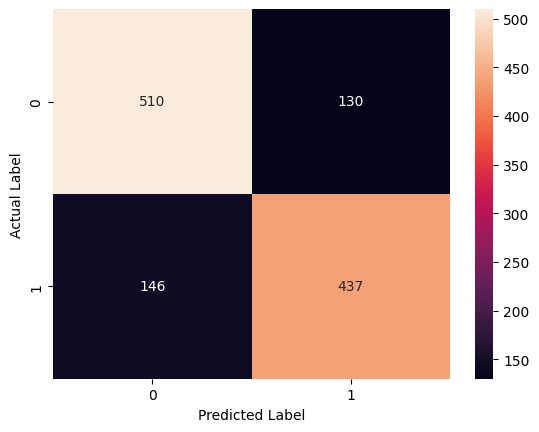

In [88]:
yu_test_pred = model_rfc.predict(Xu_test_scale)
yu_test_pred
acc = accuracy_score(yu_test, yu_test_pred)
cm = confusion_matrix(yu_test, yu_test_pred)
sns.heatmap(cm, annot = True,fmt='g')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

- **True Positive** = 437
- **True Negative** = 510
- **False Positive** = 130
- **False Negative** = 146
- Có thể thấy sử dụng **NearMiss** đang cho ra độ chính xác dự đoán thấp hơn một ít so với **UnderSampling ngẫu nhiên**

### **RandomOverSampler** train and evaluate model 

#### **Train Model**

In [89]:
model_lrc.fit(Xo_train_scale,yo_train)
model_svc.fit(Xo_train_scale,yo_train)
model_knc.fit(Xo_train_scale,yo_train)
model_dtc.fit(Xo_train_scale,yo_train)
model_nbc.fit(Xo_train_scale,yo_train)
model_rfc.fit(Xo_train_scale,yo_train)

RandomForestClassifier()

#### **Evaluate Model**

##### Logistic Regression

In [90]:
yo_pred = model_lrc.predict(Xo_train_scale)
print(classification_report(yo_train,yo_pred))

              precision    recall  f1-score   support

           0       0.71      0.72      0.71      5537
           1       0.72      0.71      0.71      5611

    accuracy                           0.71     11148
   macro avg       0.71      0.71      0.71     11148
weighted avg       0.71      0.71      0.71     11148



In [91]:
yo_pred = model_lrc.predict(Xo_test_scale)
print(classification_report(yo_test,yo_pred))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71      2426
           1       0.70      0.70      0.70      2352

    accuracy                           0.71      4778
   macro avg       0.71      0.71      0.71      4778
weighted avg       0.71      0.71      0.71      4778



- Model **Logistic Regression** có độ chính xác tương tự các model trước

##### SVC

In [92]:
yo_pred = model_svc.predict(Xo_train_scale)
print(classification_report(yo_train,yo_pred))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82      5537
           1       0.83      0.81      0.82      5611

    accuracy                           0.82     11148
   macro avg       0.82      0.82      0.82     11148
weighted avg       0.82      0.82      0.82     11148



In [93]:
yo_pred = model_svc.predict(Xo_test_scale)
print(classification_report(yo_test,yo_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      2426
           1       0.79      0.79      0.79      2352

    accuracy                           0.80      4778
   macro avg       0.80      0.80      0.80      4778
weighted avg       0.80      0.80      0.80      4778



- Model **SVC** có độ chính xác cao hơn so với 2 model SVC trước
- **Train**= 0.82, **Test**= 0.8 (lý tưởng)

##### KNN Classifier

In [94]:
yo_pred = model_knc.predict(Xo_train_scale)
print(classification_report(yo_train,yo_pred))

              precision    recall  f1-score   support

           0       0.92      0.81      0.86      5537
           1       0.83      0.93      0.88      5611

    accuracy                           0.87     11148
   macro avg       0.88      0.87      0.87     11148
weighted avg       0.88      0.87      0.87     11148



In [95]:
yo_pred = model_knc.predict(Xo_test_scale)
print(classification_report(yo_test,yo_pred))

              precision    recall  f1-score   support

           0       0.84      0.76      0.79      2426
           1       0.77      0.85      0.81      2352

    accuracy                           0.80      4778
   macro avg       0.80      0.80      0.80      4778
weighted avg       0.80      0.80      0.80      4778



- Model **KNN** có độ chính xác trên tệp train cao hơn so với tệp test
- **Train**= 0.87, **Test**= 0.8

##### Gaussian NB

In [96]:
yo_pred = model_nbc.predict(Xo_train_scale)
print(classification_report(yo_train,yo_pred))

              precision    recall  f1-score   support

           0       0.70      0.74      0.72      5537
           1       0.73      0.68      0.70      5611

    accuracy                           0.71     11148
   macro avg       0.71      0.71      0.71     11148
weighted avg       0.71      0.71      0.71     11148



In [97]:
yo_pred = model_nbc.predict(Xo_test_scale)
print(classification_report(yo_test,yo_pred))

              precision    recall  f1-score   support

           0       0.71      0.72      0.71      2426
           1       0.70      0.69      0.70      2352

    accuracy                           0.71      4778
   macro avg       0.71      0.71      0.71      4778
weighted avg       0.71      0.71      0.71      4778



- Model **GaussianNB** có độ chính xác = Model **Logistic Regression**

##### Decision Tree Classifier

In [98]:
yo_pred = model_dtc.predict(Xo_train_scale)
print(classification_report(yo_train,yo_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5537
           1       1.00      1.00      1.00      5611

    accuracy                           1.00     11148
   macro avg       1.00      1.00      1.00     11148
weighted avg       1.00      1.00      1.00     11148



In [99]:
yo_pred = model_svc.predict(Xo_test_scale)
print(classification_report(yo_test,yo_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      2426
           1       0.79      0.79      0.79      2352

    accuracy                           0.80      4778
   macro avg       0.80      0.80      0.80      4778
weighted avg       0.80      0.80      0.80      4778



##### Random Forest Classifier

In [100]:
yo_pred = model_rfc.predict(Xo_train_scale)
print(classification_report(yo_train,yo_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5537
           1       1.00      1.00      1.00      5611

    accuracy                           1.00     11148
   macro avg       1.00      1.00      1.00     11148
weighted avg       1.00      1.00      1.00     11148



In [101]:
yo_pred = model_rfc.predict(Xo_test_scale)
print(classification_report(yo_test,yo_pred))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94      2426
           1       0.91      0.98      0.94      2352

    accuracy                           0.94      4778
   macro avg       0.94      0.94      0.94      4778
weighted avg       0.94      0.94      0.94      4778



- Với 2 model **Decision Tree** và **Random Forest**, cả hai đều cho ra độ chính xác ở tệp train tương đồng.
- Nhưng ở tệp test, model có độ chính xác cao nhất là **Random Forest Classifier** = 94%

#### **Conclusion 3**

- Với kỹ thuật xử lý dữ liệu imbalanced = **RandomOverSample** độ chính xác của các model tăng lên một cách đáng kể
- Model có độ chính xác cao nhất sau 3 kỹ thuật xử lý dữ liệu mất cân bằng chính là **Random Forest Classifier** của kỹ thuật **RandomOverSample**
- Với độ chính xác trên tệp **Train** là 100% và **Test** là 94%

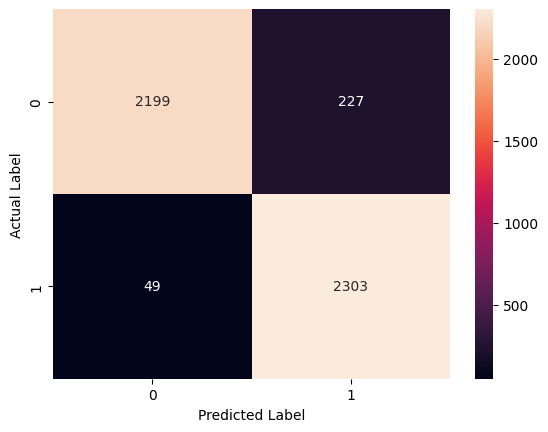

In [102]:
yo_test_pred = model_rfc.predict(Xo_test_scale)
acc = accuracy_score(yo_test, yo_test_pred)
cm = confusion_matrix(yo_test, yo_test_pred)
sns.heatmap(cm, annot = True,fmt='g')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

- **True Positive** = 2303
- **True Negative** = 2199
- **False Positive** = 227
- **False Negative** = 49
- Có thể thấy với kỹ thuật xử lý **RandomOverSample**, tỉ lệ dự đoán sai của model là rất thấp ==> Hiệu quả

### **SMOTE** train and evaluate model

#### **Train Model**

In [104]:
model_lrc.fit(Xsm_train_scale,ysm_train)
model_svc.fit(Xsm_train_scale,ysm_train)
model_knc.fit(Xsm_train_scale,ysm_train)
model_dtc.fit(Xsm_train_scale,ysm_train)
model_nbc.fit(Xsm_train_scale,ysm_train)
model_rfc.fit(Xsm_train_scale,ysm_train)

RandomForestClassifier()

#### **Evaluate Model**

##### Logistic Regression

In [105]:
ysm_pred = model_lrc.predict(Xsm_train_scale)
print(classification_report(ysm_train,ysm_pred))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72      5537
           1       0.72      0.73      0.73      5611

    accuracy                           0.72     11148
   macro avg       0.72      0.72      0.72     11148
weighted avg       0.72      0.72      0.72     11148



In [106]:
ysm_pred = model_lrc.predict(Xsm_test_scale)
print(classification_report(ysm_test,ysm_pred))

              precision    recall  f1-score   support

           0       0.73      0.71      0.72      2426
           1       0.71      0.73      0.72      2352

    accuracy                           0.72      4778
   macro avg       0.72      0.72      0.72      4778
weighted avg       0.72      0.72      0.72      4778



- Model **Logistic Regression** có độ chính xác xấp xỉ như những model trên ==> Model này không hiệu quả cho data được cho

##### SVC

In [108]:
ysm_pred = model_svc.predict(Xsm_train_scale)
print(classification_report(ysm_train,ysm_pred))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89      5537
           1       0.92      0.85      0.88      5611

    accuracy                           0.89     11148
   macro avg       0.89      0.89      0.89     11148
weighted avg       0.89      0.89      0.89     11148



In [110]:
ysm_pred = model_svc.predict(Xsm_test_scale)
print(classification_report(ysm_test,ysm_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      2426
           1       0.89      0.83      0.86      2352

    accuracy                           0.87      4778
   macro avg       0.87      0.87      0.87      4778
weighted avg       0.87      0.87      0.87      4778



- Độ chính xác trên model **SVC** vẫn luôn nằm ở mức lý tưởng cho cả 4 cách 
- **Train**= 0.89, **Test**= 0.87

##### KNN Classifier

In [111]:
ysm_pred = model_knc.predict(Xsm_train_scale)
print(classification_report(ysm_train,ysm_pred))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90      5537
           1       0.89      0.93      0.91      5611

    accuracy                           0.90     11148
   macro avg       0.91      0.90      0.90     11148
weighted avg       0.91      0.90      0.90     11148



In [112]:
ysm_pred = model_knc.predict(Xsm_test_scale)
print(classification_report(ysm_test,ysm_pred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85      2426
           1       0.83      0.86      0.85      2352

    accuracy                           0.85      4778
   macro avg       0.85      0.85      0.85      4778
weighted avg       0.85      0.85      0.85      4778



- Ở cách xử lý dữ liệu = **SMOTE** các model đang có xư hướng có độ chính xác cao 
- Model **KNN Classifier** có độ chính xác **Train**= 0.9, **Test**=0.85

##### GaussianNB

In [113]:
ysm_pred = model_nbc.predict(Xsm_train_scale)
print(classification_report(ysm_train,ysm_pred))

              precision    recall  f1-score   support

           0       0.73      0.77      0.75      5537
           1       0.76      0.72      0.74      5611

    accuracy                           0.75     11148
   macro avg       0.75      0.75      0.75     11148
weighted avg       0.75      0.75      0.75     11148



In [114]:
ysm_pred = model_nbc.predict(Xsm_test_scale)
print(classification_report(ysm_test,ysm_pred))

              precision    recall  f1-score   support

           0       0.75      0.76      0.75      2426
           1       0.75      0.74      0.74      2352

    accuracy                           0.75      4778
   macro avg       0.75      0.75      0.75      4778
weighted avg       0.75      0.75      0.75      4778



- Model **GaussianNB** cho cả 4 hình thức đều có độ chính xác không quá cao
- Không thích hợp sử dụng cho data này

##### Decision Tree Classifier

In [115]:
ysm_pred = model_dtc.predict(Xsm_train_scale)
print(classification_report(ysm_train,ysm_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5537
           1       1.00      1.00      1.00      5611

    accuracy                           1.00     11148
   macro avg       1.00      1.00      1.00     11148
weighted avg       1.00      1.00      1.00     11148



In [116]:
ysm_pred = model_dtc.predict(Xsm_test_scale)
print(classification_report(ysm_test,ysm_pred))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85      2426
           1       0.84      0.86      0.85      2352

    accuracy                           0.85      4778
   macro avg       0.85      0.85      0.85      4778
weighted avg       0.85      0.85      0.85      4778



##### Random Forest Classifier

In [117]:
ysm_pred = model_rfc.predict(Xsm_train_scale)
print(classification_report(ysm_train,ysm_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5537
           1       1.00      1.00      1.00      5611

    accuracy                           1.00     11148
   macro avg       1.00      1.00      1.00     11148
weighted avg       1.00      1.00      1.00     11148



In [118]:
ysm_pred = model_rfc.predict(Xsm_test_scale)
print(classification_report(ysm_test,ysm_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      2426
           1       0.94      0.88      0.91      2352

    accuracy                           0.91      4778
   macro avg       0.91      0.91      0.91      4778
weighted avg       0.91      0.91      0.91      4778



- Model **Random Forest Classifier** luôn cho ra độ chính xác cao nhất 
- **Train**: 100%, **Test**: 91%

#### **Conclusion 4**

- Với cách xử lý **OverSampling** = **SMOTE**, model cho ra độ chính xác cao nhất là **Random Forest Classifier**
- Tuy nhiên có những model ở cách xử lý dữ liệu này có độ chính xác cao hơn 3 cách trước là **SVC**, **KNN Classifier**

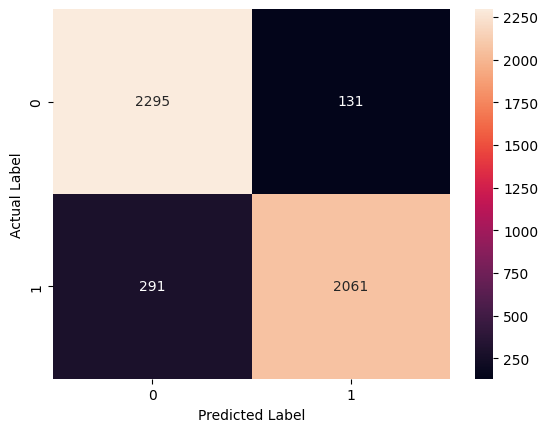

In [119]:
ysm_test_pred = model_rfc.predict(Xsm_test_scale)
acc = accuracy_score(ysm_test, ysm_test_pred)
cm = confusion_matrix(ysm_test, ysm_test_pred)
sns.heatmap(cm, annot = True,fmt='g')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

- Model **Random Forest Classifier** của **SMOTE**:
- **True Positive**: 2061
- **True Negative**: 2295
- **False Positive**: 131
- **False Negative**: 291

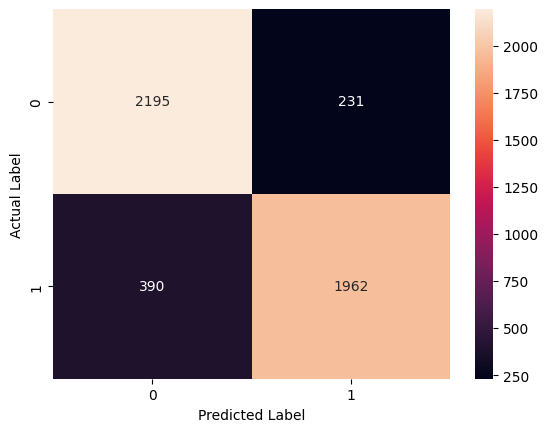

In [120]:
ysm_test_pred = model_svc.predict(Xsm_test_scale)
acc = accuracy_score(ysm_test, ysm_test_pred)
cm = confusion_matrix(ysm_test, ysm_test_pred)
sns.heatmap(cm, annot = True,fmt='g')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

- Model **SVC** của **SMOTE**:
- **True Positive**: 1962
- **True Negative**: 2195
- **False Positive**: 231
- **False Negative**: 390

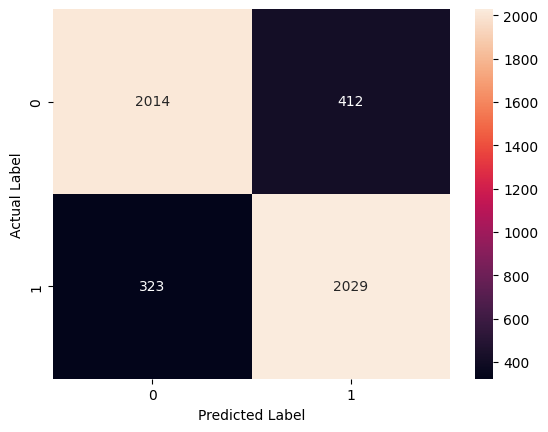

In [121]:
ysm_test_pred = model_knc.predict(Xsm_test_scale)
acc = accuracy_score(ysm_test, ysm_test_pred)
cm = confusion_matrix(ysm_test, ysm_test_pred)
sns.heatmap(cm, annot = True,fmt='g')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

- Model **KNN Classifier** của **SMOTE**:
- **True Positive**: 2029
- **True Negative**: 2014
- **False Positive**: 412
- **False Negative**: 323

## **Conclusion**

- Với dữ liệu trên, sử dụng **OverSampling** để xử lý dữ liệu mất cân bằng là hiệu quả nhất
- Bằng cách sử dụng **Random Over Sample**, độ chính xác của model **Random Forest Classifier** đạt ngưỡng cao nhất là (**Train**= 1 và **Test**= 0.94)
- Model có độ chính xác cao nhất trong cả 2 cách **RandomOverSample** và **SMOTE** đều là **Random Forest Classifier** ==> Model hiệu quả nhất
- Ngoài ra vẫn có một số model nên cân nhắc như: **SVC** và **KNN Classifier**

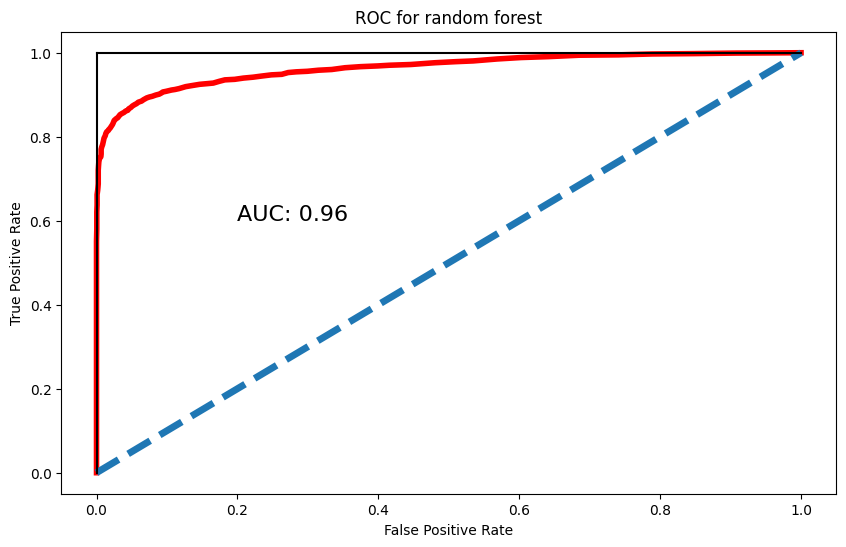

In [123]:
from sklearn.metrics import roc_auc_score,roc_curve
ysm_probabilities = model_rfc.predict_proba(Xsm_test_scale)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(ysm_test,ysm_probabilities)
plt.figure(figsize=(10,6))
plt.title('ROC for random forest')
plt.plot(false_positive_rate, true_positive_rate, linewidth=4, color='red')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='0')
plt.plot([1,1],c='0')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(ysm_test,ysm_probabilities)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [124]:
from joblib import dump
path = "model_rf_bank.joblib"
dump(model_rfc, path)

['model_rf_bank.joblib']